# Lectura de archivos de Texto

En el siguiente **Jupiter Notebook** encontrá un ejemplo de lectura, elaboración de gráficos y cálculo de estadísticos sencillos asociado a una serie de tiempo de $CO_{2}$ proveniente de las observaciones de **Mauna Loa**.

La lectura de datos se realizará ocupando las librerias **os** y **pandas**. Para ello se ocuparán las funciones **os.path.abspath(".")** que permite obtener el directorio actual donde se encuentra *ejemplo_1.ipynb*. Se debe notar que para acceder a los datos se debe acceder al directorio raíz del proyecto, esto se realiza con **os.path.dirname()** esto truco permite obtener la carpeta raiz que engloba a todo el proyecto. 

Para acceder a los datos de **Mauna Loa** se debe ocupar **os.path.join()** para acceder a los distintos directorios y subdirectorios junto al nombre del archivo *co2_mm_mlo.txt*.

Adicionalmente se importa **matplotlib.pyplot** y **seaborn** las cuales van a ser útiles en la elaboración de figuras.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os as os
import seaborn as sns

current_dir = os.path.abspath(".")
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, "data", "maunaloa", "co2_mm_mlo.txt")

En cuanto a la lectura y preprocesamiento de los datos, para leer los datos se ocupa la función **pd.read_csv()** especificando que el delimitador de las columnas en el archivo corresponden a espacios en blanco, adicionalmente los datos presentan comentarios especificados con #, lamentablemente debido a que el encabezado de los datos se encuentra comentado se debe específicar que el archivo en este caso no tiene encabezado. Esto crea en memoria la variable **data** la cual es del tipo DataFrame. 

Los DataFrames son una forma de trabajar con datos tabulados análoga a **excel** pero ocupando un lenguaje de programación y por lo tanto no se modifica el contenido del archivo.

Las operaciones realizadas en el DataFrame consiste en definir las columnas, asignar el indice como formato de fechas y eliminar las columnas asociadas a año y mes del DataFrame las cuales no serán utilizadas posteriormente



In [7]:
data = pd.read_csv(data_dir, delim_whitespace=True, comment="#", header=None)
data.columns = ["Year", "Month", "Decimal_Date", "Average_CO2", "Average_CO2_Des", "Days", "STD", "UNC"]
data["Date"] = pd.to_datetime(data["Year"].astype(str) + "-" + data["Month"].astype(str), format="%Y-%m")
data.set_index("Date", inplace=True)
data.drop(["Year", "Month"], axis=1, inplace=True)

A continuación se procede a realizar una figura para mostrar las concentraciones de $CO_{2}$, la configuración de estilos de las figuras fue detallado en el taller por lo que se sugiere revisar la grabación. Para elaborar la figura de a continuación se ocupó como base el siguiente tutorial el cual explica como realizar diversas figuras científicas en *Python* ([tutorial](https://www.youtube.com/watch?v=fwZahTYfyxA)).

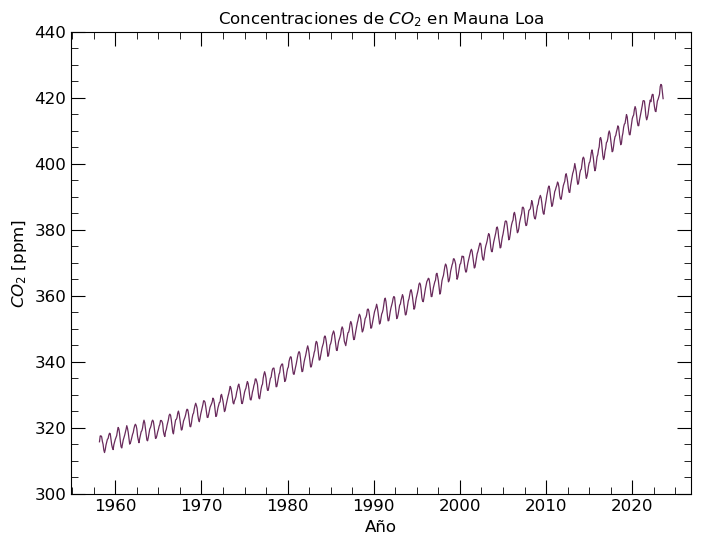

In [8]:
fig = plt.figure(1, figsize=(8,6))
ax = fig.add_subplot(111)
colors=sns.color_palette("rocket",3)
ax.plot(data["Average_CO2"], linestyle='-', label='Mauna Loa Observations', color=colors[0],alpha=0.95, linewidth=0.9)
plt.xlabel('Año', fontsize = 12)
plt.ylabel(r'$CO_{2}$ [ppm]', fontsize = 12)
plt.title(r"Concentraciones de $CO_{2}$ en Mauna Loa")
plt.ylim([300,440])
plt.minorticks_on()
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)
dir_fig = os.path.join(parent_dir, "data", "maunaloa","figures", "CO2 Mauna Loa.png")
fig.savefig(dir_fig, dpi=400)

Posteriormente se procede a calcular el promedio para cada año en base a los datos mensuales, para ello existen múltiples formas, por ejemplo con ([groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)), para este caso se ocupará la función **resample** que permite realizar conversiones o ajustes en la frecuencia de un Dataframe asociado a series de tiempo.

In [9]:
data_yearly = data.resample("Y").mean()

A continuación se elabora una figura con los datos anuales calculados previamente.


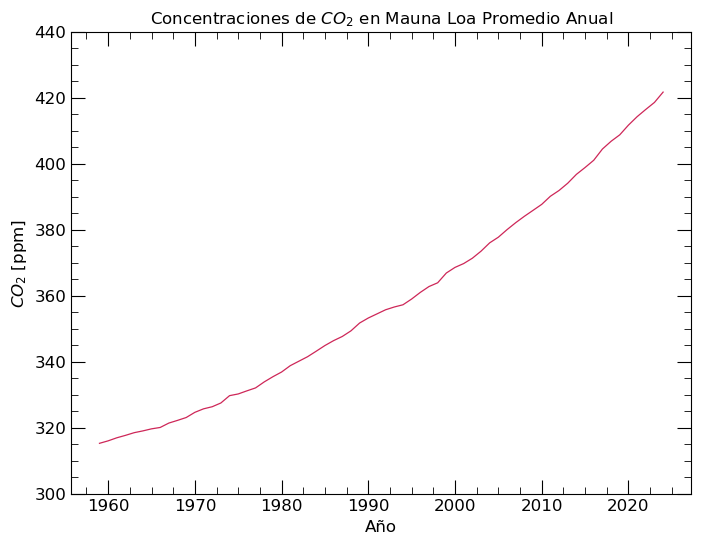

In [10]:
fig2 = plt.figure(2, figsize=(8,6))

ax2 = fig2.add_subplot(111)
colors=sns.color_palette("rocket",3)

ax2.plot(data_yearly["Average_CO2"], linestyle='-', label='Mauna Loa Observations', color=colors[1],alpha=0.95, linewidth=0.9)
plt.xlabel('Año', fontsize= 12)
plt.ylabel(r'$CO_{2}$ [ppm]', fontsize= 12)
plt.title(r"Concentraciones de $CO_{2}$ en Mauna Loa Promedio Anual")
plt.ylim([300,440])
plt.minorticks_on()
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)

plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)



dir_fig = os.path.join(parent_dir, "data", "maunaloa","figures", "CO2 Mauna Loa Yearly.png")
fig2.savefig(dir_fig, dpi=400)

Finalmente se procede a graficar en conjunto las dos figuras elaboradas anteriormente, ocupando subplots.

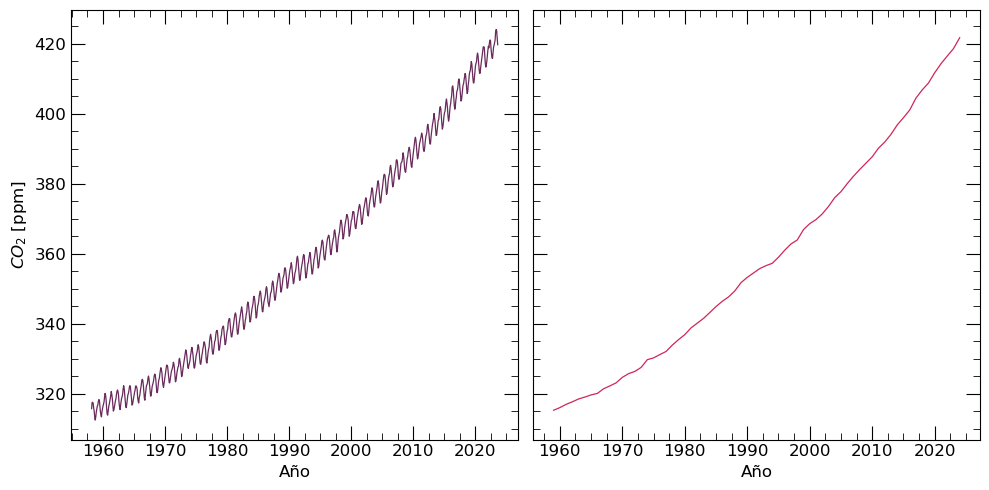

In [11]:
fig3, axs = plt.subplots(1, 2, sharey=True, figsize=(10,5))

axs[0].plot(data["Average_CO2"], linestyle='-', color=colors[0],alpha=0.95, linewidth=0.9)
axs[1].plot(data_yearly["Average_CO2"], linestyle='-', color=colors[1],alpha=0.95, linewidth=0.9)


axs[0].set_xlabel('Año', fontsize=12) 
axs[1].set_xlabel('Año', fontsize=12)  
axs[0].set_ylabel(r'$CO_{2}$ [ppm]', fontsize=12)

fig.suptitle(r"Concentraciones de $CO_{2}$ en Mauna Loa", fontsize=14)
# axs[0].ylim([300,440])

for i in range(2):
    axs[i].minorticks_on()
    axs[i].tick_params(direction='in', right=True, top=True)
    axs[i].tick_params(labelsize=12)
    if i==0:
        axs[i].tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
    axs[i].tick_params(direction='in', which='minor', length=5, bottom=True, top=True, left=True, right=True)
    axs[i].tick_params(direction='in', which='major', length=10, bottom=True, top=True, left=True, right=True)
 
fig3.tight_layout()  

dir_fig = os.path.join(parent_dir, "data", "maunaloa","figures", "CO2 Mauna Loa Subplots.png")
fig3.savefig(dir_fig, dpi=400)